In [21]:
## Importing modules and setting up other features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")


## DATA IMPORTING AND TRANSFORMATION

In [22]:
## importing a data

data = pd.read_csv("/content/tution_assistance.csv")

data

,Department,Major,Degree,School,Course Title,Course Description,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0
...,...,...,...,...,...,...,...
4363,Police,Political Science,Bachelors (BA/BS),MONTGOMERY COUNTY COMMUNITY COLLEGE,POL 101 AMERICAN GOVERMENT,"Structure, powers, and processes of the Americ...",402.0
4364,Fire/Rescue Services,NaN,Non-Degree,FIRE DEPARTMENT TRAINING NETWORK,FIREGROUND SURVIVAL & RIT,Fire Combat,1200.0
4365,Liquor Control,Information Technology,AA,MONTGOMERY COUNTY COMMUNITY COLLEGE,UNIX/LINUX SYSTEM ADMINISTRATION,These are Saturday classes.\n\nIntroduction to...,528.0
4366,Police,Other/Misc.,Other,Victory First,RDS HANDGUN INSTRUCTOR,RDS Handgun Instructor for LEO only,750.0


In [23]:
## finding the overview of the data.

data.describe()

,Cost
count,4368.000000
mean,786.263024
std,533.319613
min,0.000000
25%,366.000000
50%,700.000000
75%,1015.000000
max,2300.000000


In [24]:
## describing the columns of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          4368 non-null   object 
 1   Major               3883 non-null   object 
 2   Degree              4368 non-null   object 
 3   School              4368 non-null   object 
 4   Course Title        4368 non-null   object 
 5   Course Description  4171 non-null   object 
 6   Cost                4368 non-null   float64
dtypes: float64(1), object(6)
memory usage: 239.0+ KB


In [25]:
## removing unused columns

data = data[["Department","Major","Degree","School","Course Title","Cost"]]
data

,Department,Major,Degree,School,Course Title,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,1569.0
...,...,...,...,...,...,...
4363,Police,Political Science,Bachelors (BA/BS),MONTGOMERY COUNTY COMMUNITY COLLEGE,POL 101 AMERICAN GOVERMENT,402.0
4364,Fire/Rescue Services,NaN,Non-Degree,FIRE DEPARTMENT TRAINING NETWORK,FIREGROUND SURVIVAL & RIT,1200.0
4365,Liquor Control,Information Technology,AA,MONTGOMERY COUNTY COMMUNITY COLLEGE,UNIX/LINUX SYSTEM ADMINISTRATION,528.0
4366,Police,Other/Misc.,Other,Victory First,RDS HANDGUN INSTRUCTOR,750.0


## EXPLORATORY AND DESCRIPTIVE STATISTICS


### FREQUENCY DISTRIBUTION

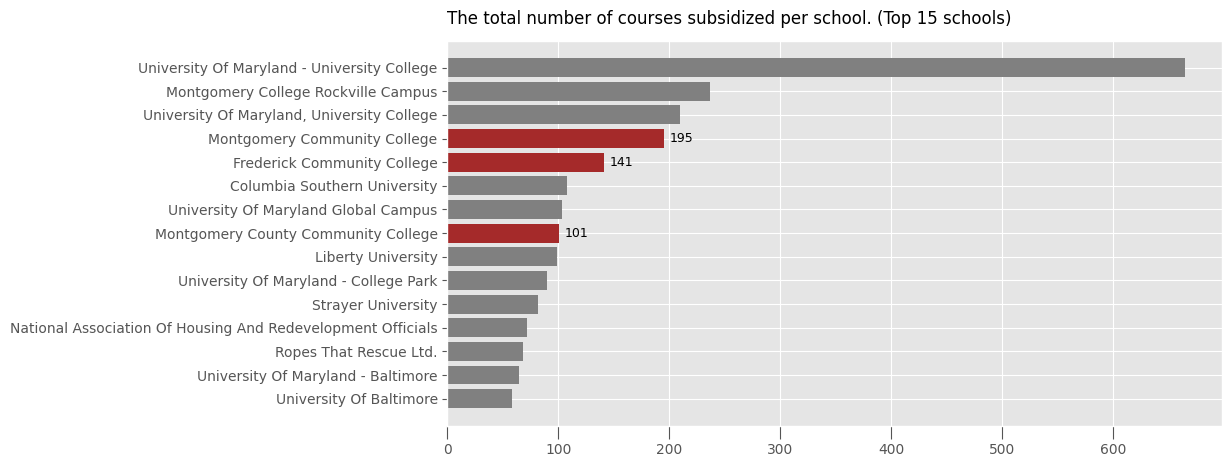

In [26]:
plot_data = data[data["Degree"] == "Bachelors (BA/BS)"]

plot_data = data.groupby("School").agg(
    Total_Count = ("Cost","count"),
    Average_Cost = ("Cost","mean"),
    Total_Cost = ("Cost","sum")
)

plot_data = plot_data.reset_index()
plot_data["Average_Cost"] = round(plot_data["Average_Cost"])
plot_data["Total_Cost"] = round(plot_data["Total_Cost"])
plot_data = plot_data.sort_values(by="Total_Count",ascending=False)

plot_data = plot_data.head(15)

plot_data = plot_data.sort_values(by="Total_Count",ascending=True)
plot_data["School"]  = plot_data["School"].str.title()


## plugging the axes
plot_data_x  = plot_data["School"]
plot_data_y = plot_data["Total_Count"]

plot_colors = []



fig, ax = plt.subplots(figsize=(10,5))

for school, value in zip(plot_data_x , plot_data_y):
  if "Community" in school:
    plot_colors.append("brown")
    item_index = np.where(plot_data_x == school)[0]
    ax.text(value + 5, item_index, f'{value}',va="center",size=9)
  else:
    plot_colors.append("gray")

ax.barh(plot_data_x, plot_data_y, color=plot_colors)

ax.tick_params(axis="x",size=9)

ax.set_title("The total number of courses subsidized per school. (Top 15 schools)", size=12, pad=12, loc="left")


plt.show()

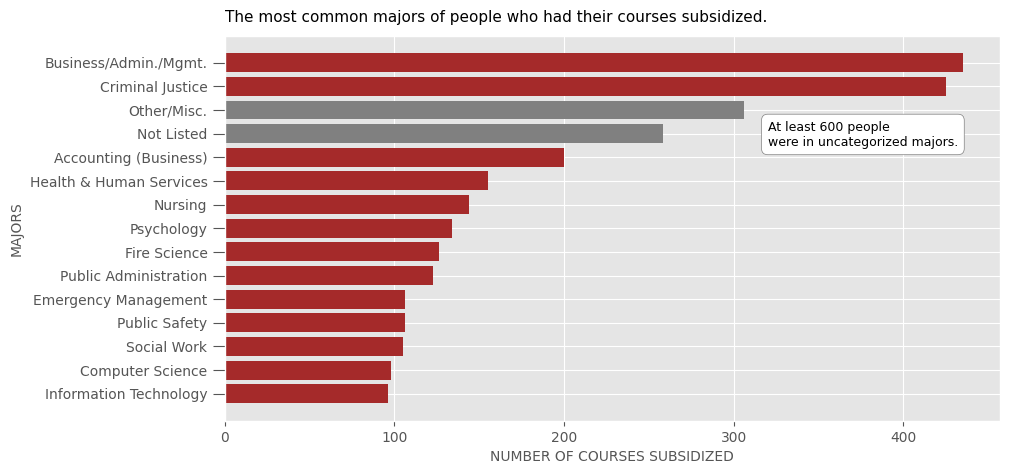

In [27]:
## Identifying the majors with the highest number of subsidized courses.

plot_data = data.groupby("Major")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(
    columns={
        "School":"Total Count"
    }
)
plot_data = plot_data.sort_values(by="Total Count",ascending=False)

plot_data = plot_data.head(15)

plot_data = plot_data.sort_values(by="Total Count",ascending=True)

## plugging the data in the axes
plot_data_x = plot_data["Total Count"]
plot_data_y = plot_data["Major"]


plot_data_colors = []
for degree in plot_data_y:
  if degree == "Other/Misc." or degree == "Not Listed":
    plot_data_colors.append("gray")
  else:
    plot_data_colors.append("brown")

## visualizing the data on a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(plot_data_y,plot_data_x,color=plot_data_colors)

## Customizing and modifying the graph.
ax.set_ylabel("MAJORS", size=10)
ax.set_xlabel("NUMBER OF COURSES SUBSIDIZED",size=10)
ax.set_title("The most common majors of people who had their courses subsidized.",size=11,pad=10,loc="left")
ax.tick_params(
    axis="y",size=9
)

## Adding annotations

ax.text(320,10.5,
        "At least 600 people \nwere in uncategorized majors.",
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        },
        size=9)


plt.show()

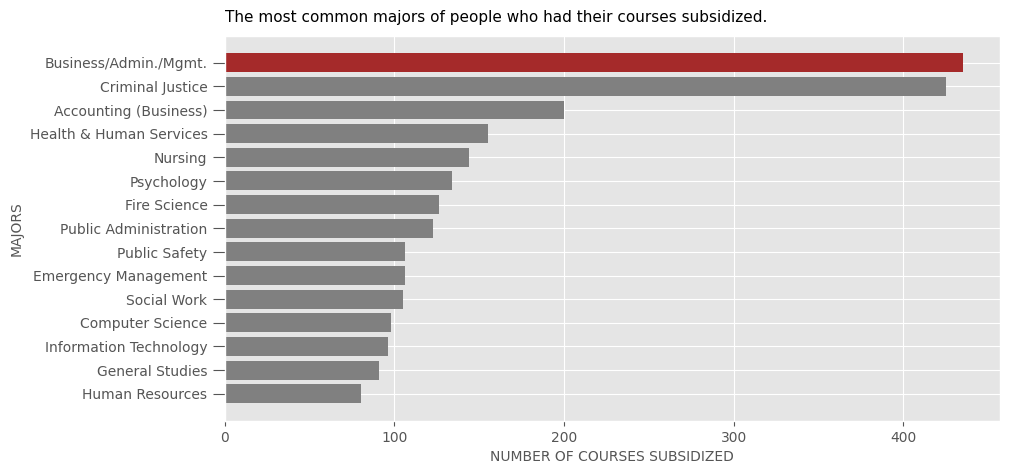

In [28]:
## Identifying the majors with the highest number of subsidized courses.

plot_data = data.groupby("Major")["School"].count()

plot_data = plot_data.reset_index()
plot_data = plot_data[(plot_data["Major"] != "Other/Misc.") & (plot_data["Major"] != "Not Listed")]
plot_data = plot_data.rename(
    columns={
        "School":"Total Count"
    }
)
plot_data = plot_data.sort_values(by="Total Count",ascending=False)

plot_data = plot_data.head(15)

plot_data = plot_data.sort_values(by="Total Count",ascending=True)

## plugging the data in the axes
plot_data_x = plot_data["Total Count"]
plot_data_y = plot_data["Major"]
plot_data_colors = []

for color in range(plot_data_y.count()):
  if color != plot_data_y.count() - 1:
    plot_data_colors.append("gray")
  else:
    plot_data_colors.append("brown")

## visualizing the data on a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(plot_data_y,plot_data_x,color=plot_data_colors)

## Customizing and modifying the graph.
ax.set_ylabel("MAJORS", size=10)
ax.set_xlabel("NUMBER OF COURSES SUBSIDIZED",size=10)
ax.set_title("The most common majors of people who had their courses subsidized.",size=11,pad=10,loc="left")
ax.tick_params(
    axis="y",size=9
)

## Adding annotations

plt.show()

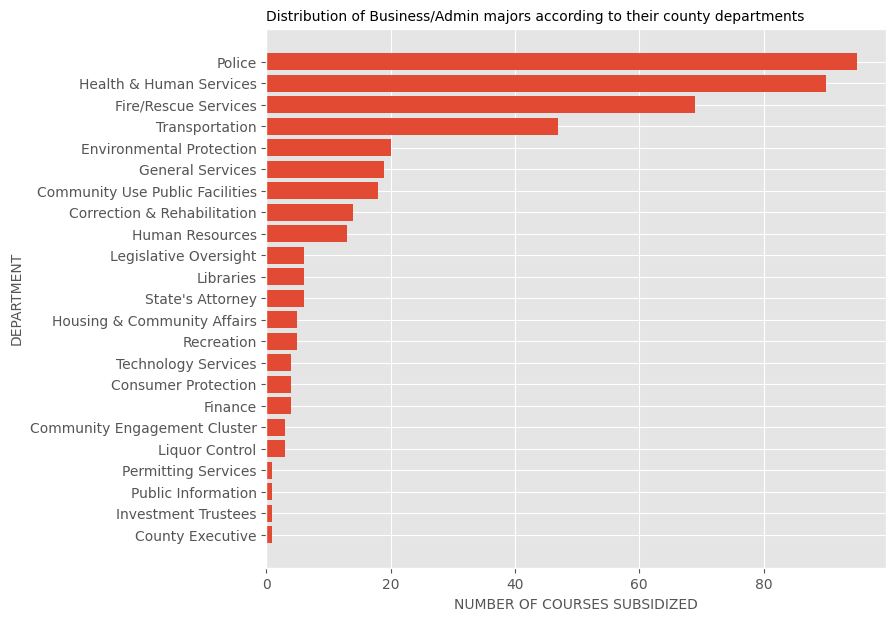

In [29]:
## filtering only the courses taken by people with the business / admin majors
## according to department

plot_data = data[data["Major"] == "Business/Admin./Mgmt."]
plot_data = plot_data.groupby("Department")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(columns={
    "School":"Total Count"
})
plot_data = plot_data.sort_values(by="Total Count",ascending=True)

## plugging the axes
plot_data_y = plot_data["Department"]
plot_data_x = plot_data["Total Count"]

fig, ax = plt.subplots(figsize=(8,7))



ax.barh(plot_data_y,plot_data_x)
ax.set_ylabel("DEPARTMENT", size=10)
ax.set_xlabel("NUMBER OF COURSES SUBSIDIZED",size=10)
ax.set_title("Distribution of Business/Admin majors according to their county departments",loc="left",size=10)

plt.show()

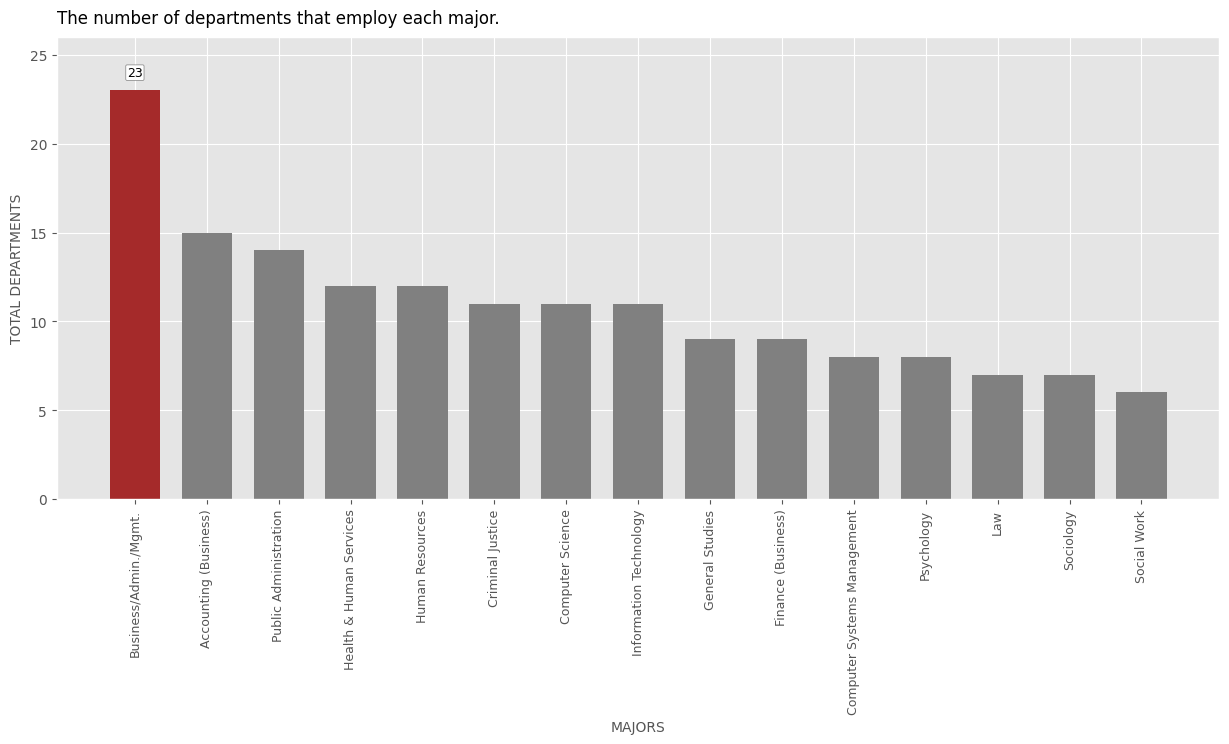

In [30]:
## count the unique departments a major is present in

plot_data = data.groupby("Major")["Department"].nunique()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(columns={
    "Department":"Total Count of Department"
})
plot_data = plot_data.sort_values(by="Total Count of Department",ascending=False)
plot_data = plot_data[
    (plot_data["Major"] != "Not Listed") & (plot_data["Major"] != "Other/Misc.")
]


plot_data = plot_data.head(15)

plot_data_x = plot_data["Major"]
plot_data_y = plot_data["Total Count of Department"]

plot_colors = []

counter = 0
for x in range(0,plot_data_x.count()):
  if counter == 0:
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")
  counter += 1

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(plot_data_x, plot_data_y,width=0.7,color=plot_colors)
ax.tick_params(axis="x", labelsize=9,rotation=90)
ax.set_ylim(0,26)
ax.set_title("The number of departments that employ each major.",loc="left",size=12,pad=10)


ax.text(0, 23 + 1, 23, ha="center", va="center", size=9,
            bbox={
                "facecolor":"white",
                "edgecolor":"gray",
                "boxstyle":"round, pad=0.1"
            })

ax.set_ylabel("TOTAL DEPARTMENTS", size=10)
ax.set_xlabel("MAJORS",size=10)

plt.show()


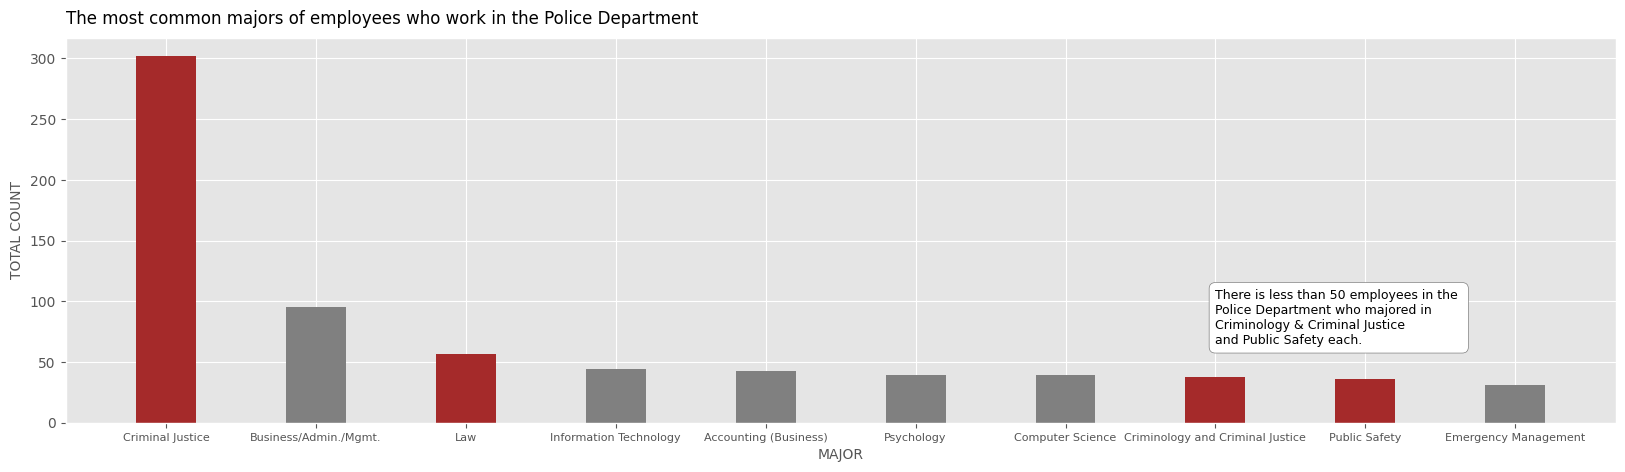

In [31]:
## APPENDIX
## finding the majors of the individuals who work in the police department

plot_data = data[data["Department"] == "Police"]
plot_data = plot_data.groupby("Major")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(columns={
    "School":"Total Count"
})
plot_data = plot_data.sort_values("Total Count",ascending=False)
plot_data = plot_data[(plot_data["Major"] != "Not Listed") & (plot_data["Major"] != "Other/Misc.") & (plot_data["Major"] != "Job Related")]
plot_data = plot_data.head(10)

## plotting the axes
plot_data_x = plot_data["Major"]
plot_data_y = plot_data["Total Count"]
plot_colors = []

for major in plot_data_x:
  if major == "Criminal Justice" or major == "Criminology and Criminal Justice" or major == "Public Safety" or major == "Law":
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")

fig, ax = plt.subplots(figsize=(20,5))

ax.bar(plot_data_x,plot_data_y,width=0.4,color=plot_colors)


ax.set_xlabel("MAJOR",size=10)
ax.set_ylabel("TOTAL COUNT",size=10)
ax.set_title("The most common majors of employees who work in the Police Department",size=12, loc="left",pad=10)

ax.text(
    7,65,
    "There is less than 50 employees in the \nPolice Department who majored in \nCriminology & Criminal Justice \nand Public Safety each.",
    size=9,
    bbox={
        "facecolor":"white",
        "edgecolor":"gray",
        "boxstyle":"round, pad=0.5"
    }
)

ax.tick_params(axis="x", labelsize=8)

plt.show()

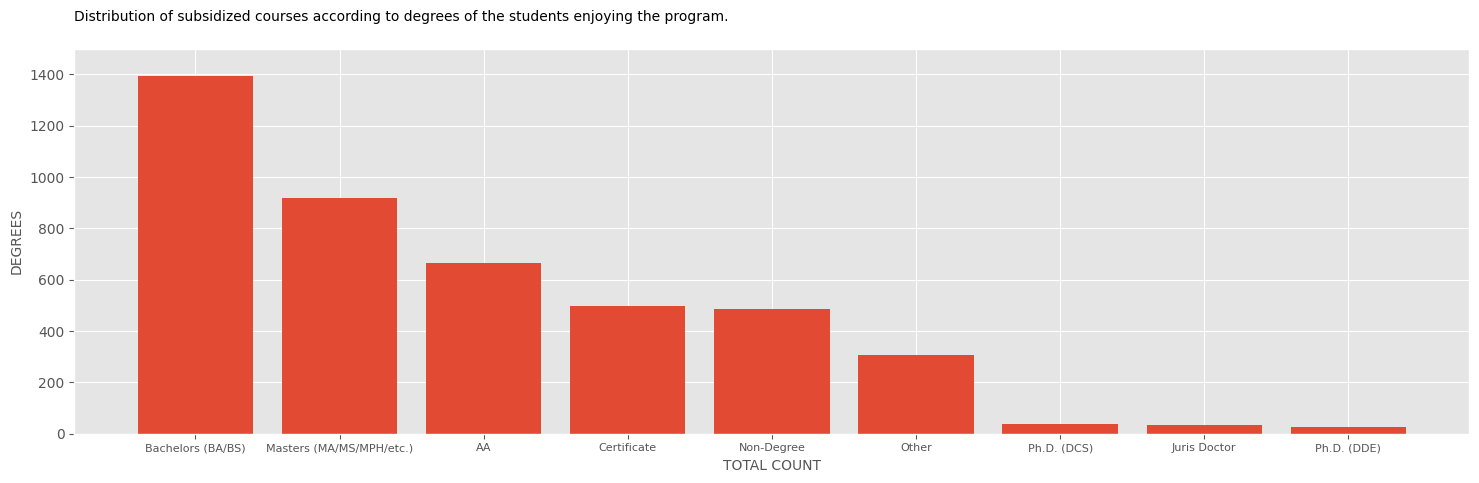

In [32]:
## APPENDIX
## Distribution of courses according to the degrees

plot_data = data.groupby("Degree")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(columns={"School":"Total Count"})
plot_data = plot_data.sort_values(by="Total Count",ascending=False)

plot_data_x = plot_data["Degree"]
plot_data_y = plot_data["Total Count"]



## plotting the data

fig, ax = plt.subplots(figsize=(18,5))

ax.bar(plot_data_x,plot_data_y)
ax.set_title("Distribution of subsidized courses according to degrees of the students enjoying the program.",size=10, loc="left",pad=20)
ax.tick_params(axis="x",labelsize=8)

ax.set_ylabel("DEGREES", size=10)
ax.set_xlabel("TOTAL COUNT",size=10)

ax.set(ylim=(0,1500))
plt.show()



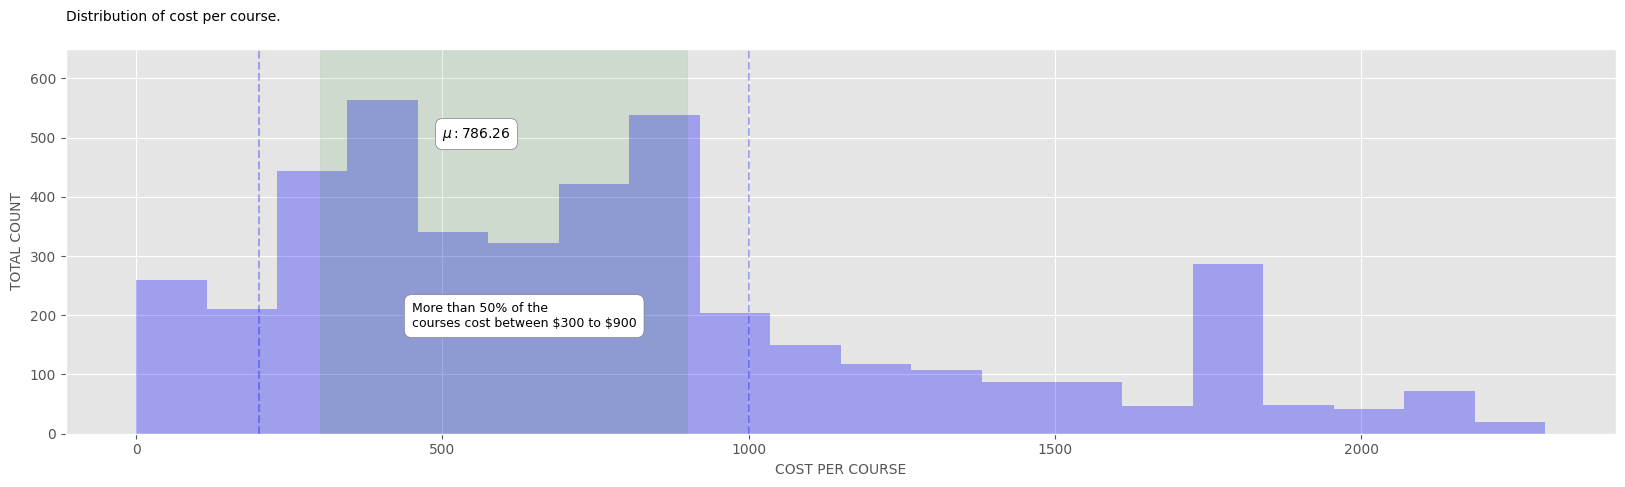

In [33]:
## Distribution of courses according to cost

fig, ax = plt.subplots(figsize=(20,5))
plot_data = data["Cost"]

ax.hist(plot_data,20,color="blue",alpha=0.3)
ax.set_ylim(0,650)

## setting lines in the majority of the costs

ax.axvline(200,linestyle="--",color="blue",alpha=0.3)
ax.axvline(1000,linestyle="--",color="blue",alpha=0.3)
ax.axvspan(300,900,color="green",alpha=0.1)

## adding some annotation

cost_mean = plot_data.mean()

ax.text(500,500,
        r'$\mu:786.26$',
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        },
        size=10)

ax.text(450,180,
        "More than 50% of the \ncourses cost between \$300 to \$900",
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.6"
        },
        size=9)

ax.set_title("Distribution of cost per course.",size=10,loc="left",pad=20)
ax.set_ylabel("Frequency",size=10)

ax.set_ylabel("TOTAL COUNT", size=10)
ax.set_xlabel("COST PER COURSE",size=10)


plt.show()



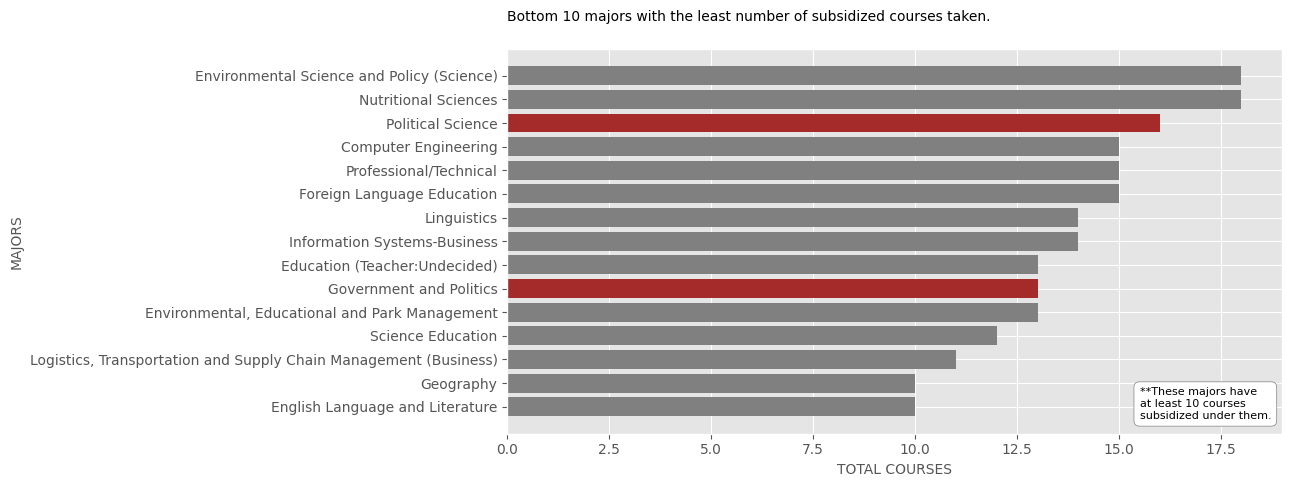

In [34]:
## least common courses in majors.

plot_data = data.groupby("Major")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(columns={
    "School":"Total Count"
})

plot_data = plot_data[
    plot_data["Total Count"] >= 10
]

plot_data = plot_data.sort_values(by="Total Count",ascending=True)
plot_data = plot_data.head(15)
plot_colors = []

## plugging the axes

plot_data_x = plot_data["Total Count"]
plot_data_y = plot_data["Major"]

## setting the colors for bars

for item in plot_data_y:
  if item == "Political Science" or item == "Government and Politics":
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")

## creating the bar chart

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(plot_data_y, plot_data_x,color=plot_colors)
ax.set_title("Bottom 10 majors with the least number of subsidized courses taken.",size=10, loc="left",pad=20)
ax.set_xlim(0,19)

ax.set_ylabel("MAJORS", size=10)
ax.set_xlabel("TOTAL COURSES",size=10)


ax.text(
    15.5,-0.5,
    "**These majors have \nat least 10 courses \nsubsidized under them.",
    size=8,
    bbox={
        "facecolor":"white",
        "edgecolor":"gray",
        "boxstyle":"round,pad=0.5"
    }
)
plt.show()


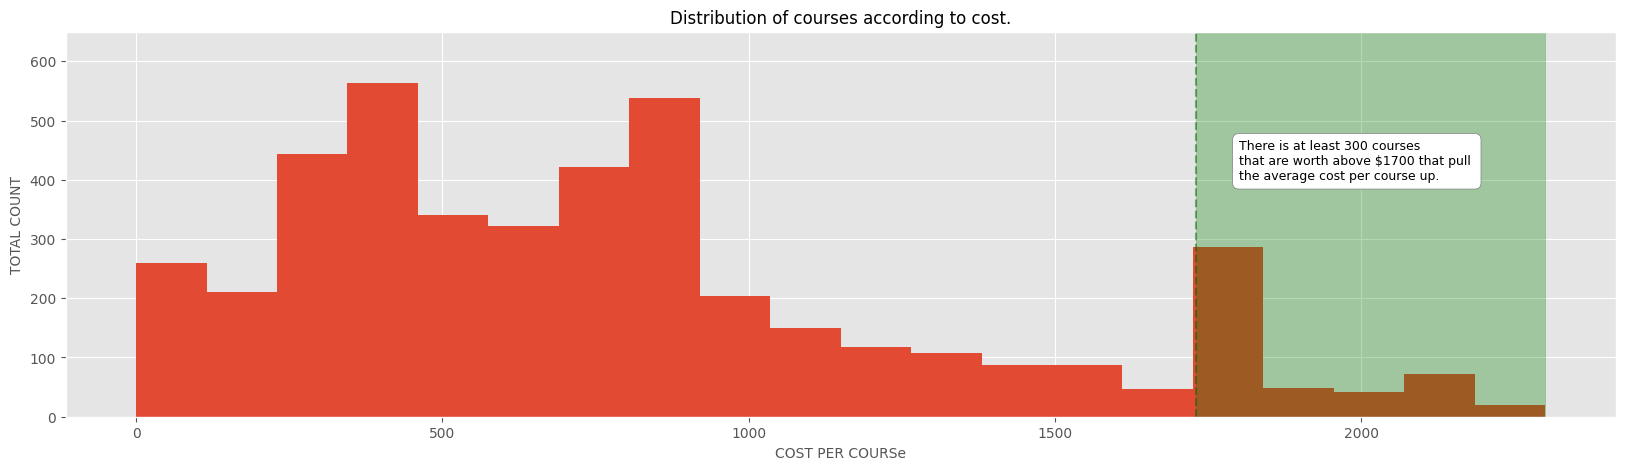

In [35]:
## APPENDIX
## outliers in the upper end of the dataset.

plot_data = data["Cost"]

fig, ax = plt.subplots(figsize=(20,5))
ax.hist(plot_data,20)
perc_90 = plot_data.quantile(0.90)

ax.axvline(
    perc_90,
    color="darkgreen",
    alpha=0.5,
    linestyle="--"
)

ax.axvspan(
    perc_90,
    2300,
    color="green",
    alpha=0.3
)

ax.text(
    1800,400,
    "There is at least 300 courses \nthat are worth above \$1700 that pull \nthe average cost per course up.",
    bbox={
        "facecolor":"white",
        "edgecolor":"gray",
        "boxstyle":"round,pad=0.5"
    },
    size=9
)

ax.set_title(
    "Distribution of courses according to cost.",
    size=12
)


ax.set_ylabel("TOTAL COUNT", size=10)
ax.set_xlabel("COST PER COURSe",size=10)

ax.set_ylim(0,650)

plt.show()



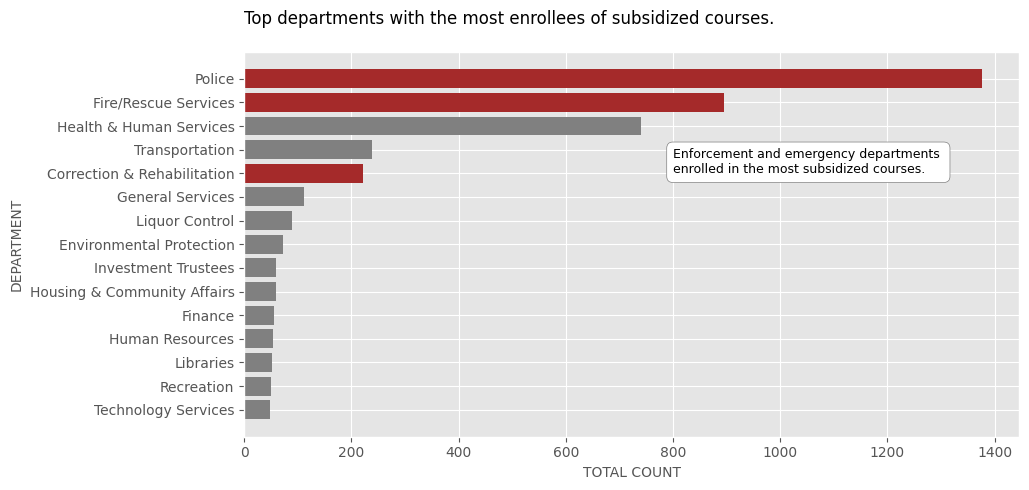

In [36]:
## APPENDIX
## enrollees per department

plot_data = data.groupby("Department")["School"].count()
plot_data = plot_data.reset_index()
plot_data = plot_data.rename(
    columns={
        "School":"Total Count"
    }
)
plot_data = plot_data.sort_values(by="Total Count",ascending=False)
plot_data = plot_data.head(15)
plot_data = plot_data.sort_values(by="Total Count",ascending=True)


## plugging the values
plot_data_x = plot_data["Total Count"]
plot_data_y = plot_data["Department"]
plot_colors = []

for x in plot_data_y:
  if x in ["Police","Fire/Rescue Services","Correction & Rehabilitation"]:
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")

## visualizing the bars

fig, ax = plt.subplots(figsize=(10,5))

ax.barh(plot_data_y, plot_data_x,color=plot_colors)

ax.set_title("Top departments with the most enrollees of subsidized courses.", pad=20, loc="left",size=12)

ax.text(800,10,
        "Enforcement and emergency departments \nenrolled in the most subsidized courses.",
        size=9,
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        }
        )

ax.set_ylabel("DEPARTMENT", size=10)
ax.set_xlabel("TOTAL COUNT",size=10)


plt.show()

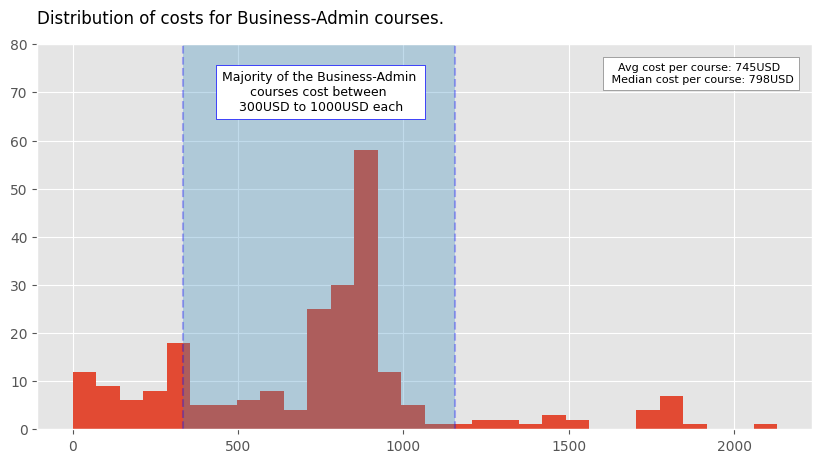

,Cost
count,236.000000
mean,744.894492
std,411.216828
min,0.000000
25%,487.250000
50%,798.000000
75%,900.000000
max,2130.000000


In [37]:
## finding the average course cost for business and admin majors

plot_data  = data[data["Major"] == "Business/Admin./Mgmt."]
plot_data = plot_data[plot_data["Degree"] == "Bachelors (BA/BS)"]

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(plot_data["Cost"],30)
upper_limit = plot_data["Cost"].mean() + plot_data["Cost"].std()
lower_limit = plot_data["Cost"].mean() - plot_data["Cost"].std()


## enclosing the area for the common values of the course cost.
ax.axvline(upper_limit,linestyle="--",color="b",alpha=0.3)
ax.axvline(lower_limit,linestyle="--",color="b",alpha=0.3)
ax.axvspan(upper_limit,lower_limit,alpha=0.3)

## adjusting the axes
ax.set_ylim(0,80)

## adding labels
ax.text(
    750,70,
    "Majority of the Business-Admin \ncourses cost between \n300USD to 1000USD each",
    size=9,
    ha="center",
    va="center",
    bbox={
        "facecolor":"white",
        "edgecolor":"blue"
    }
)

## adding legends for mean etc
ax.text(
    1900,74,
    f"Avg cost per course: {round(plot_data['Cost'].mean())}USD \n Median cost per course: {round(plot_data['Cost'].median())}USD",
    size=8,
    ha="center",
    va="center",
    bbox={
        "facecolor":"white",
        "edgecolor":"gray"
    }
)

ax.set_title("Distribution of costs for Business-Admin courses.",size=12,loc="left",pad=15)

plt.show()

plot_data.describe()

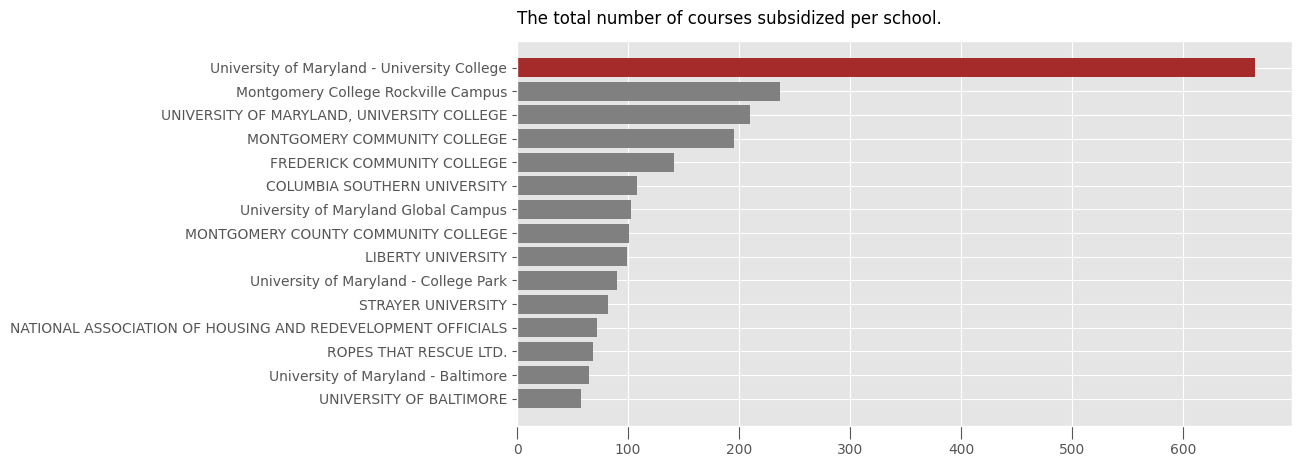

In [38]:
## Community colleges and their legacies

plot_data = data[data["Degree"] == "Bachelors (BA/BS)"]

plot_data = data.groupby("School").agg(
    Total_Count = ("Cost","count"),
    Average_Cost = ("Cost","mean"),
    Total_Cost = ("Cost","sum")
)

plot_data = plot_data.reset_index()
plot_data["Average_Cost"] = round(plot_data["Average_Cost"])
plot_data["Total_Cost"] = round(plot_data["Total_Cost"])
plot_data = plot_data.sort_values(by="Total_Count",ascending=False)

plot_data = plot_data.head(15)

plot_data = plot_data.sort_values(by="Total_Count",ascending=True)


## plugging the axes
plot_data_x  = plot_data["School"]
plot_data_y = plot_data["Total_Count"]

plot_colors = []

for value in plot_data_y:
  if value == plot_data["Total_Count"].max():
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")


fig, ax = plt.subplots(figsize=(10,5))

ax.barh(plot_data_x, plot_data_y, color=plot_colors)

ax.tick_params(axis="x",size=9)

ax.set_title("The total number of courses subsidized per school.", size=12, pad=12, loc="left")

plt.show()

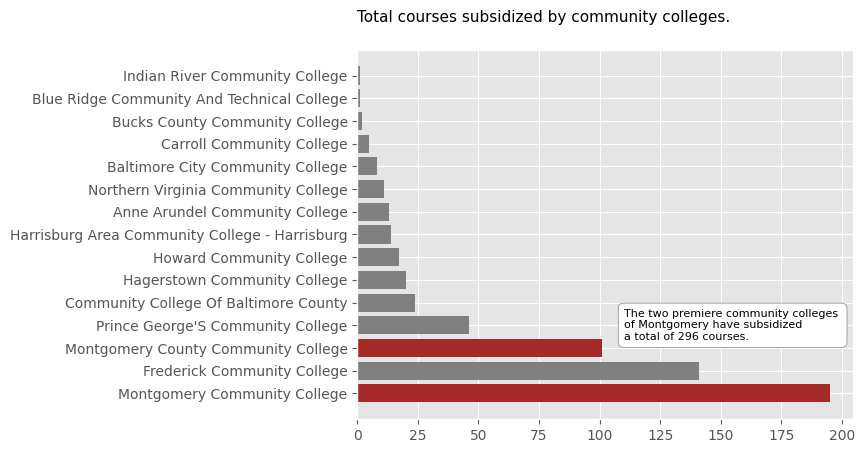

In [39]:
plot_data = data[data["Degree"] == "Bachelors (BA/BS)"]

plot_data = data.groupby("School").agg(
    Total_Count = ("Cost","count"),
    Average_Cost = ("Cost","mean"),
    Total_Cost = ("Cost","sum")
)

plot_data = plot_data.reset_index()
plot_data["School"] = plot_data["School"].str.title()

plot_data = plot_data[plot_data["School"].str.contains("Community")]

plot_data = plot_data.sort_values(by="Total_Count",ascending=False)

## plugging the chart



plot_data_x = plot_data["School"]
plot_data_y = plot_data["Total_Count"]
plot_colors = []

for school in plot_data_x:
  if "Montgomery" in school:
    plot_colors.append("brown")
  else:
    plot_colors.append("gray")


fig, ax = plt.subplots()

ax.barh(plot_data_x, plot_data_y,color=plot_colors)

ax.set_title("Total courses subsidized by community colleges.",size=11,loc="left",pad=20)

ax.text(110,3,
        "The two premiere community colleges \nof Montgomery have subsidized \na total of 296 courses.",
        size=8,
        va="center",
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        }
        )


plt.show()

/tmp/ipython-input-40-346438118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["School"] = data["School"].str.title()


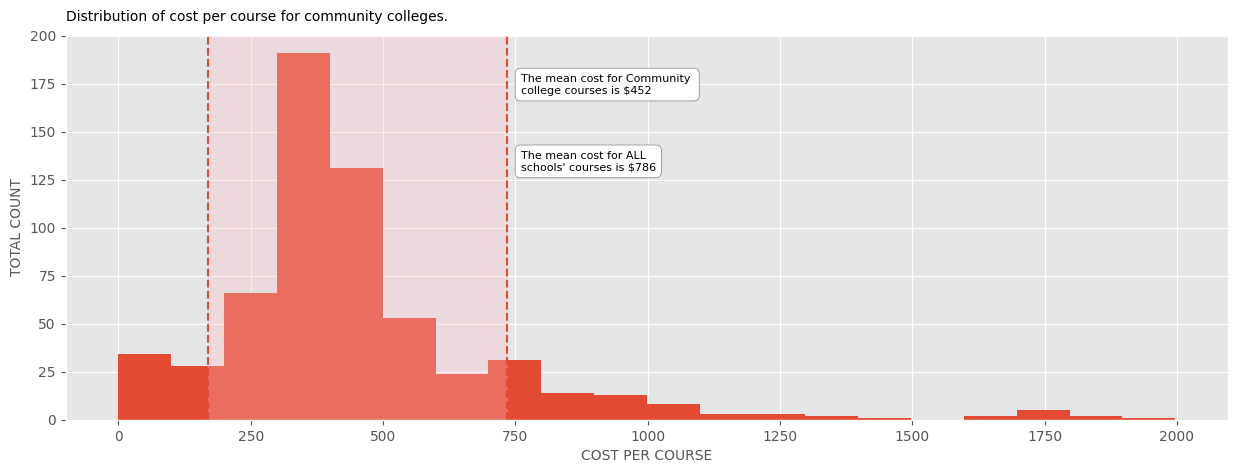

In [40]:

data["School"] = data["School"].str.title()
plot_data = data[data["School"].str.contains("Community")]

## plugging the axes

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(plot_data["Cost"],bins=20)

mean_cost = plot_data["Cost"].mean()
upper_limit = mean_cost + plot_data["Cost"].std()
lower_limit = mean_cost - plot_data["Cost"].std()

ax.axvline(lower_limit,linestyle="--")
ax.axvline(upper_limit,linestyle="--")
ax.axvspan(lower_limit, upper_limit, color="pink",alpha=0.3)

ax.text(760,170,"The mean cost for Community \ncollege courses is $452",size=8,
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        })


ax.text(760,130,"The mean cost for ALL \nschools' courses is $786",size=8,
        bbox={
            "facecolor":"white",
            "edgecolor":"gray",
            "boxstyle":"round,pad=0.5"
        })

ax.set_title("Distribution of cost per course for community colleges.",size=10,loc="left", pad=10)


ax.set_ylabel("TOTAL COUNT", size=10)
ax.set_xlabel("COST PER COURSE",size=10)

plt.show()
